In [36]:
from google.colab import files
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt




In [32]:
filz = files.upload()

Saving Reguya Jovan - insurance - Reguya Jovan - insurance.csv to Reguya Jovan - insurance - Reguya Jovan - insurance (1).csv


In [33]:
csv = pd.read_csv('Reguya Jovan - insurance - Reguya Jovan - insurance.csv')
csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [31]:
#checking if my dataset has null values
import pandas as pd
from io import StringIO

file_content = filz['Reguya Jovan - insurance - Reguya Jovan - insurance.csv'].decode('utf-8')
df = pd.read_csv(StringIO(file_content))
totalofNull = df.isnull().sum()
print(totalofNull)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [29]:
#since my dataset has STRING it cannot collab with my categories that is Integer so i have to use Label Encoder and OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()


csv['sex'] = label.fit_transform(csv['sex'])
csv['smoker'] = label.fit_transform(csv['smoker'])
csv['region'] = label.fit_transform(csv['region'])

hotenco = OneHotEncoder()

age_encoded = hotenco.fit_transform(csv[['age']])
bmi_encoded = hotenco.fit_transform(csv[['bmi']])
child_encoded = hotenco.fit_transform(csv[['children']])




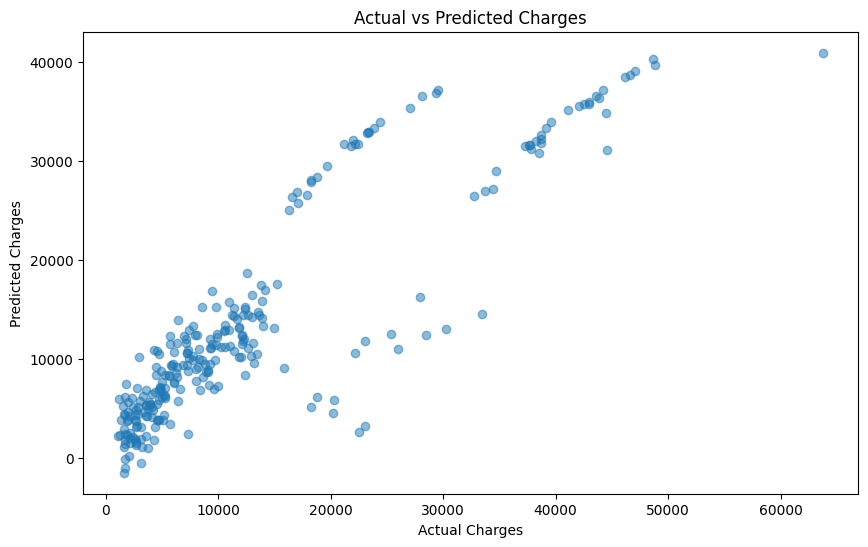

Prediction Accuracy 0.7833463107364539


In [40]:
#setting up my model training ground
X = csv.drop('charges', axis=1)
y = csv['charges']


for col in ['sex', 'smoker', 'region']:
    X[col] = label.fit_transform(X[col])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#importing LinearRegression as Callable Variable
LinReg = LinearRegression()

trainingGround = LinReg.fit(X_train,y_train)

score = LinReg.score(X_test,y_test)

prediction = LinReg.predict(X_test)

#displaying the results using mathplotlib
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

#checking the accuracy of my model.
print("Prediction Accuracy", score)
